# Import các thư viện


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


# Đọc dữ liệu


In [2]:
df = pd.read_csv("../../Data/Created Data/hotel_bookings_added_revenue.csv")
df


,arrival_date,reservation_status_date,hotel,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,...,babies,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,continent,revenue
0,2015-07-01,2015-07-01,Resort Hotel,BB,PRT,Direct,Direct,C,C,No Deposit,...,0,0,0,3,0,0.00,0,0,Europe,0.00
1,2015-07-01,2015-07-01,Resort Hotel,BB,PRT,Direct,Direct,C,C,No Deposit,...,0,0,0,4,0,0.00,0,0,Europe,0.00
2,2015-07-01,2015-07-02,Resort Hotel,BB,GBR,Direct,Direct,A,C,No Deposit,...,0,0,0,0,0,75.00,0,0,Europe,75.00
3,2015-07-01,2015-07-02,Resort Hotel,BB,GBR,Corporate,Corporate,A,A,No Deposit,...,0,0,0,0,0,75.00,0,0,Europe,75.00
4,2015-07-01,2015-07-03,Resort Hotel,BB,GBR,Online TA,TA/TO,A,A,No Deposit,...,0,0,0,0,0,98.00,0,1,Europe,196.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87360,2017-08-30,2017-09-06,City Hotel,BB,BEL,Offline TA/TO,TA/TO,A,A,No Deposit,...,0,0,0,0,0,96.14,0,0,Europe,672.98
87361,2017-08-31,2017-09-07,City Hotel,BB,FRA,Online TA,TA/TO,E,E,No Deposit,...,0,0,0,0,0,225.43,0,2,Europe,1578.01
87362,2017-08-31,2017-09-07,City Hotel,BB,DEU,Online TA,TA/TO,D,D,No Deposit,...,0,0,0,0,0,157.71,0,4,Europe,1103.97
87363,2017-08-31,2017-09-07,City Hotel,BB,GBR,Online TA,TA/TO,A,A,No Deposit,...,0,0,0,0,0,104.40,0,0,Europe,730.80


Chuyển đổi kiểu dữ liệu có yếu tố thời gian thành `datetime`


In [3]:
def change_df(df):
    format_year = "%Y-%m-%d"

    df["arrival_date"] = pd.to_datetime(df["arrival_date"], format=format_year)
    df["reservation_status_date"] = pd.to_datetime(
        df["reservation_status_date"], format=format_year
    )

change_df(df)


# I TỔNG QUAN VỀ TÌNH HÌNH ĐẶT PHÒNG KHÁCH SẠN LOẠI "CITY"

## 1. Tỷ lệ đặt phòng chia theo khách nội địa và quốc tế

In [4]:
hotel_data = df
city_hotel_data = hotel_data[hotel_data['hotel'] == 'City Hotel']

internal_customers = city_hotel_data[city_hotel_data['country'] == 'PRT']
foreign_customers = city_hotel_data[city_hotel_data['country'] != 'PRT']

total_customers = len(city_hotel_data)
internal_percentage = len(internal_customers) / total_customers * 100
foreign_percentage = len(foreign_customers) / total_customers * 100

internal_percentage, foreign_percentage


(24.729451413592958, 75.27054858640703)

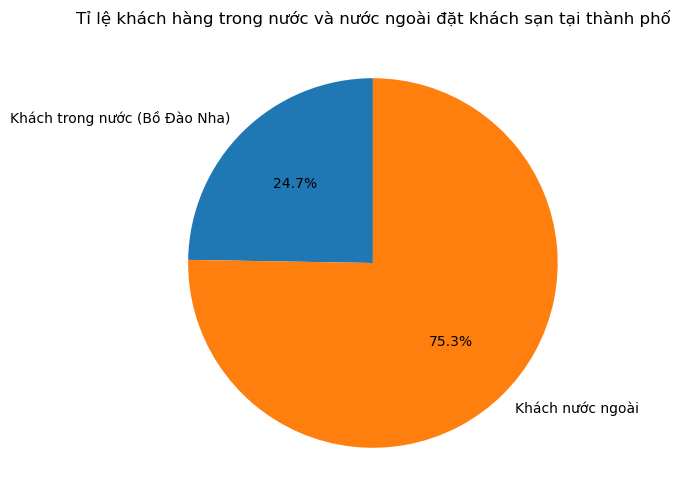

In [5]:
plt.figure(figsize=(10, 6))
plt.pie([internal_percentage, foreign_percentage], labels=['Khách trong nước (Bồ Đào Nha)', 'Khách nước ngoài'], autopct='%1.1f%%', startangle=90)
plt.title('Tỉ lệ khách hàng trong nước và nước ngoài đặt khách sạn tại thành phố')
plt.show()

__Nhận xét__:
- Tỉ lệ khách nước ngoài đặt khách sạn loại City chiếm số lượng lớn hơn đáng kể so với khách nội địa (gấp khoảng 3 lần).
- Nguyên nhân: khách nước ngoài yêu thích lựa chọn City Hotel vì địa điểm thuận tiện để đi khám phá các địa điểm trong thành phố. Còn với khách nội địa, họ thường chọn các loại khách sạn khác như Resort để trải nghiệm những nơi mới vì họ vốn dĩ đã ở trong thành phố.
- Chiến lược cho các khách sạn City: 

## 2. Tỷ lệ khách quốc tế đặt phòng

In [7]:
foreign_nationalities = foreign_customers['country'].value_counts()

foreign_nationalities_percentage = (foreign_nationalities / len(foreign_customers)) * 100

# top 10 highest countries
top_countries = foreign_nationalities_percentage.head(10)

top_countries


FRA    18.436894
GBR    11.260634
DEU    11.106413
ESP     9.409980
ITA     6.581762
BEL     4.203771
BRA     3.947565
NLD     3.559524
USA     3.524700
CHE     2.872991
Name: country, dtype: float64

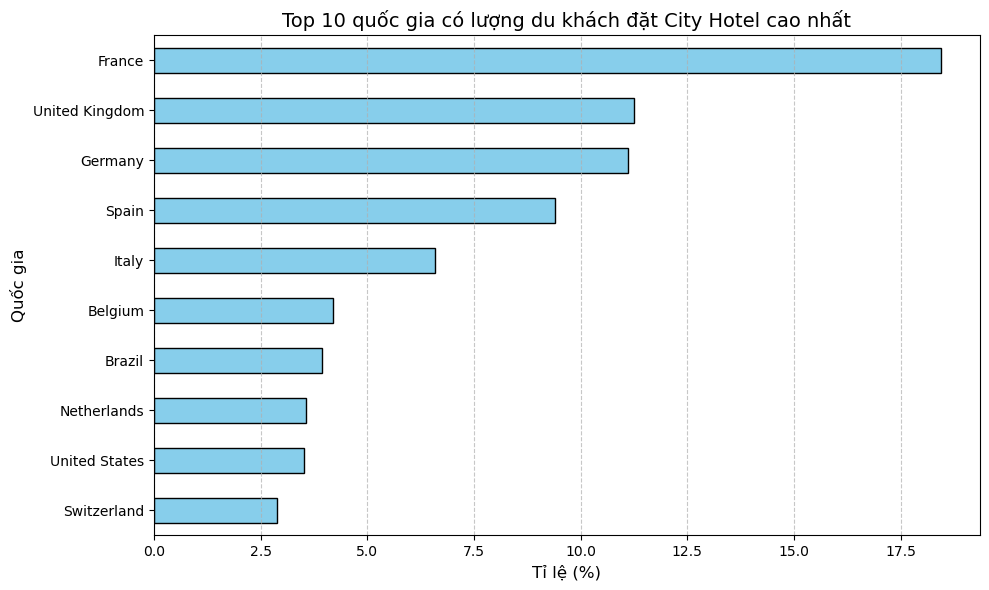

In [10]:
# top 10 countries with highest percentage of foreign customers
plt.figure(figsize=(10, 6))
top_10_countries = top_countries.sort_values(ascending=True).tail(10)
top_10_countries.sort_values().plot(kind='barh', color='skyblue', edgecolor='black')

mapping = {
    'GBR': 'United Kingdom',
    'FRA': 'France',
    'DEU': 'Germany',
    'ESP': 'Spain',
    'ITA': 'Italy',
    'IRL': 'Ireland',
    'BEL': 'Belgium',
    'BRA': 'Brazil',
    'NLD': 'Netherlands',
    'USA': 'United States',
    'CHE': 'Switzerland',
}
plt.yticks(ticks=range(10), labels=[mapping.get(country, country) for country in top_10_countries.index])

plt.title('Top 10 quốc gia có lượng du khách đặt City Hotel cao nhất', fontsize=14)
plt.xlabel('Tỉ lệ (%)', fontsize=12)
plt.ylabel('Quốc gia', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

__ Nhận xét__:


## 3. Doanh thu phân theo loại khách đặt phòng

In [27]:
#raw number of bookings and percentages
total_bookings = city_hotel_data['customer_type'].value_counts()
percentage_bookings = (total_bookings / total_bookings.sum()) * 100

# total revenue (raw amount) and percentages
total_revenue = city_hotel_data.groupby('customer_type')['revenue'].sum()
percentage_revenue = (total_revenue / total_revenue.sum()) * 100

# all insights into a DataFrame for comparison
detailed_customer_analysis = pd.DataFrame({
    'Tổng số đơn đặt': total_bookings,
    'Tỷ lệ đơn đặt': percentage_bookings,
    'total_revenue': total_revenue,
    'Tỷ lệ revenue': percentage_revenue
}).sort_values(by='total_revenue', ascending=False)

detailed_customer_analysis


,Tổng số đơn đặt,Tỷ lệ đơn đặt,total_revenue,Tỷ lệ revenue
Transient,44632,83.564875,16345715.38,87.087000
Transient-Party,7036,13.173563,1864524.75,9.933849
Contract,1471,2.754166,498664.66,2.656795
Group,271,0.507396,60504.50,0.322357


__Nhận xét__: số lượng đơn đặt hàng nhiều cũng góp phần tăng trưởng doanh thu....

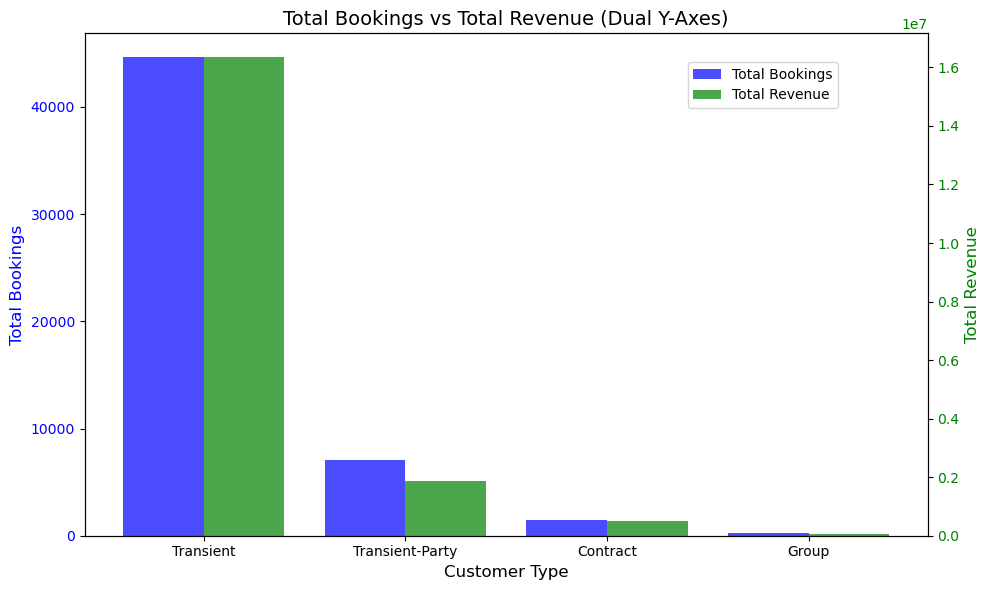

In [ ]:
fig, ax1 = plt.subplots(figsize=(10, 6))

x = range(len(detailed_customer_analysis))
bar_width = 0.4
ax1.bar(x, detailed_customer_analysis['total_bookings'], bar_width, color='blue', alpha=0.7, label='Total Bookings')
ax1.set_ylabel('Total Bookings', color='blue', fontsize=12)
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.bar([p + bar_width for p in x], detailed_customer_analysis['total_revenue'], bar_width, color='green', alpha=0.7, label='Total Revenue')
ax2.set_ylabel('Total Revenue', color='green', fontsize=12)
ax2.tick_params(axis='y', labelcolor='green')

ax1.set_xlabel('Customer Type', fontsize=12)
ax1.set_xticks([p + bar_width / 2 for p in x])
ax1.set_xticklabels(detailed_customer_analysis.index)
fig.legend(loc='upper right', bbox_to_anchor=(0.85, 0.9), fontsize=10)
plt.title('Total Bookings vs Total Revenue (Dual Y-Axes)', fontsize=14)
plt.tight_layout()
plt.show()


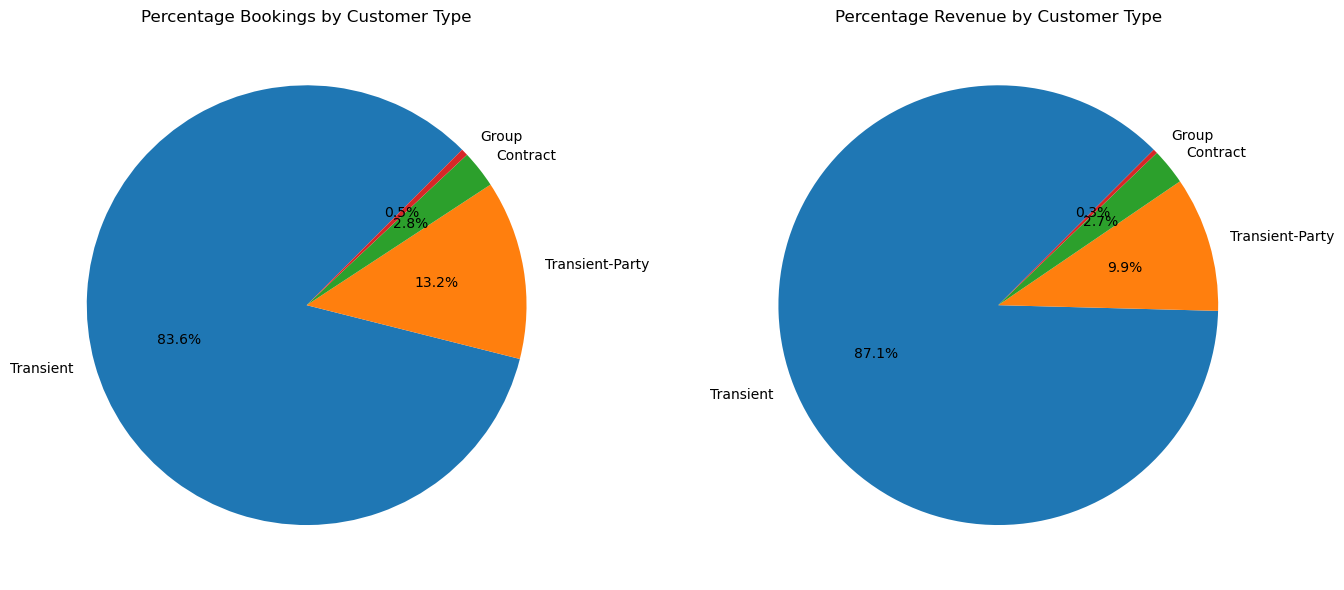

In [16]:
# draw pie chart for percentage of bookings and revenue
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

ax[0].pie(detailed_customer_analysis['percentage_bookings'], labels=detailed_customer_analysis.index, autopct='%1.1f%%', startangle=45)
ax[0].set_title('Percentage Bookings by Customer Type')


ax[1].pie(detailed_customer_analysis['percentage_revenue'], labels=detailed_customer_analysis.index, autopct='%1.1f%%', startangle=45)
ax[1].set_title('Percentage Revenue by Customer Type')

plt.tight_layout()
plt.show()



## 4. Thời điểm có lượng khách đến khách sạn đông nhất


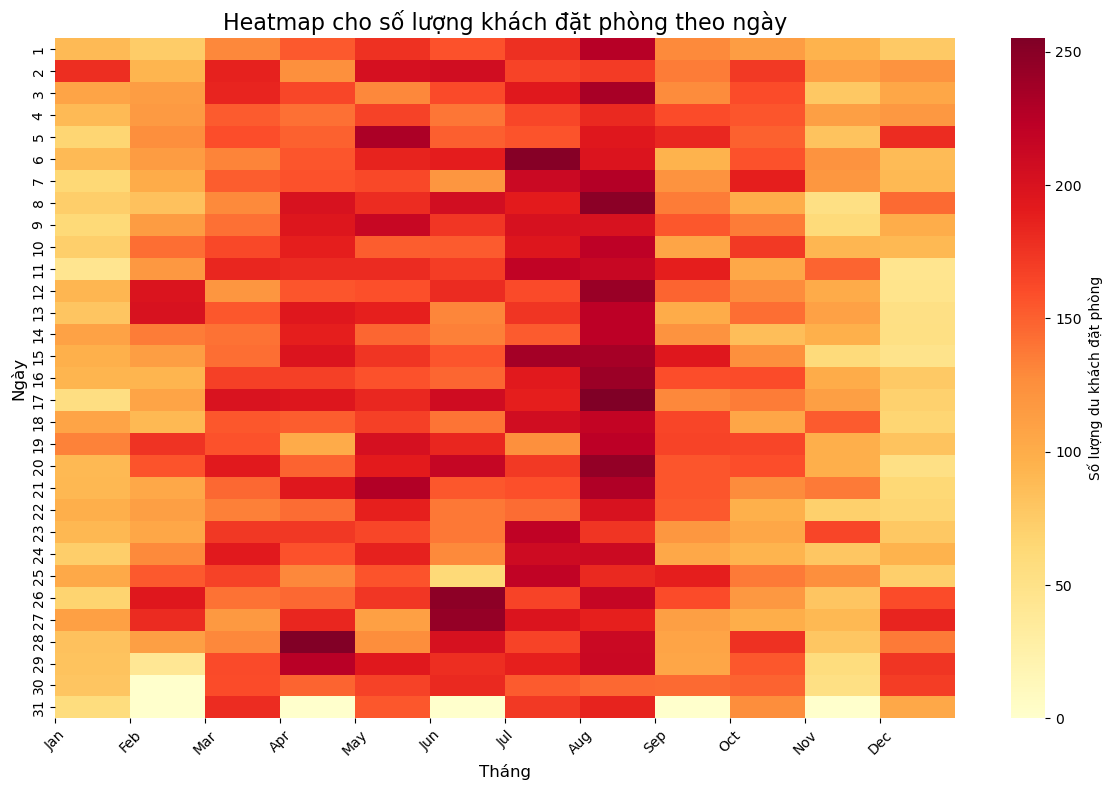

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter only City Hotel data
data = df
# Filter only City Hotel data
city_hotel_data = data[data['hotel'] == 'City Hotel']

# Convert 'arrival_date' to datetime
city_hotel_data['arrival_date'] = pd.to_datetime(city_hotel_data['arrival_date'])

# Extract month and day
city_hotel_data['arrival_month'] = city_hotel_data['arrival_date'].dt.month
city_hotel_data['arrival_day'] = city_hotel_data['arrival_date'].dt.day

# Group by month and day to calculate the number of visitors
heatmap_data = city_hotel_data.groupby(['arrival_month', 'arrival_day']).size().reset_index(name='visitor_count')

# Create a pivot table for heatmap
heatmap_pivot = heatmap_data.pivot_table(index='arrival_day', columns='arrival_month', values='visitor_count', fill_value=0)

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_pivot, cmap="YlOrRd", annot=False, cbar_kws={'label': 'Số lượng du khách đặt phòng'})
plt.title('Heatmap cho số lượng khách đặt phòng theo ngày', fontsize=16)
plt.xlabel('Tháng', fontsize=12)
plt.ylabel('Ngày', fontsize=12)
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                                    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.tight_layout()
plt.show()


__Nhận xét__:
Thời điểm tháng 8 và tháng 7 khách hàng ưa đến nhất và cũng là thời điểm tỉ lệ hủy đơn nhìn chung cao hơn với các tháng khác

Ý nghĩa: Thời điểm thích hợp để đến khách sạn nên cân nhắc tránh tháng 8 và tháng 7 vì đó là thời điểm khách sạn khá đông khách nên chất lượng có thể bị giảm đi nhiều so với khi ít khách
- Lý do
- Đề xuất
